# Step 1. Load the data and prepare it for analysis

## Importing the libraries

In [121]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Reading the dataset

In [122]:
data = pd.read_csv(r"D:\Tripleten\Projects\Sprint-10-How-to-Tell-a-Story-Using-Data\data\rest_data_us_upd.csv", sep=',')

## Data Overview

In [123]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Note
- First let's change the column names to more intuitive names.
- I will change the dataframe rows to lowercase
- I will remove the null values ​​and change the column type to inter

In [124]:
data.rename(columns={'object_name': 'rest_name', 'object_type': 'rest_type', 'number': 'number_seats'}, inplace=True)
data.head()

,id,rest_name,address,chain,rest_type,number_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [125]:
data = data.map(lambda x: x.lower() if isinstance(x, str) else x)
data.head()

,id,rest_name,address,chain,rest_type,number_seats
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


In [126]:
data.dropna(inplace=True)

data['chain'] = data['chain'].astype(int)
data['chain'].value_counts()


chain
0    5972
1    3676
Name: count, dtype: int64

Note
- Values ​​0 correspond to False and 1 corresponds to True

# Step 2. Data analysis

### Investigate the proportions of various types of establishments. Construct a graph.

In [127]:
data['rest_type'].value_counts()

rest_type
restaurant    7253
fast food     1066
cafe           435
pizza          319
bar            292
bakery         283
Name: count, dtype: int64

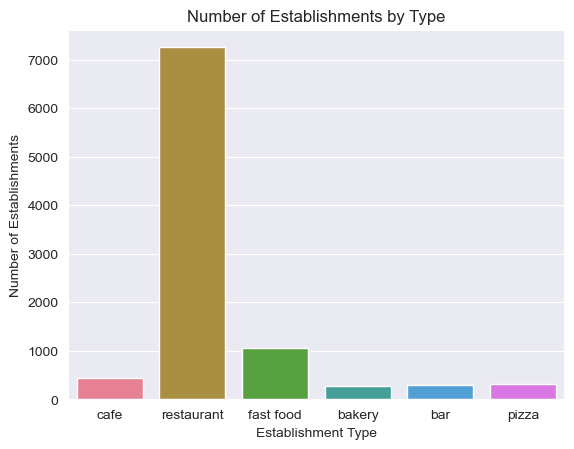

In [128]:
palette = sns.color_palette("husl", 6)

sns.countplot(data=data, x='rest_type', hue='rest_type', palette=palette, legend=False)
plt.xlabel('Establishment Type')
plt.ylabel('Number of Establishments')
plt.title('Number of Establishments by Type')
plt.show()

Note
- Here we observe that the largest number of establishments are restaurants with more than 7 thousand stores

### Investigate the proportions of chain and non-chain establishments. Construct a graph.

In [129]:
size = data.groupby(['chain', 'rest_type'])['rest_type'].size().reset_index(name='count')
size

,chain,rest_type,count
0,0,bar,215
1,0,cafe,169
2,0,fast food,461
3,0,pizza,166
4,0,restaurant,4961
5,1,bakery,283
6,1,bar,77
7,1,cafe,266
8,1,fast food,605
9,1,pizza,153


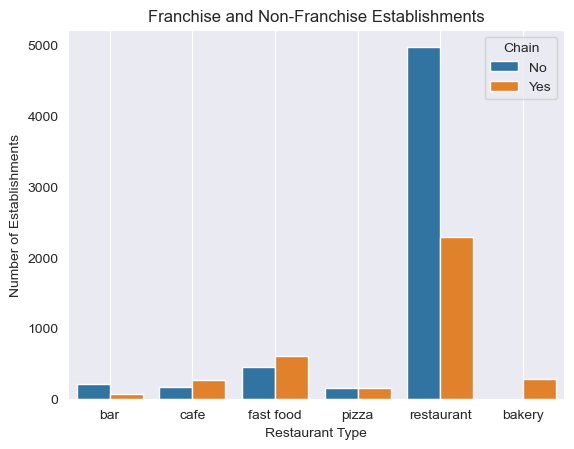

In [130]:
sns.barplot(data= size, x= 'rest_type', y='count', hue='chain', hue_order=[0, 1], errorbar=None)
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Establishments')
plt.title('Franchise and Non-Franchise Establishments')
plt.legend(title='Chain', labels=['No', 'Yes'])
plt.grid()
plt.show()

### What type of establishment is typical for chains?

In [131]:
# separating into groups of with or without franchise
chain_no = size[size['chain'] == 0]
chain_yes = size[size['chain'] == 1]

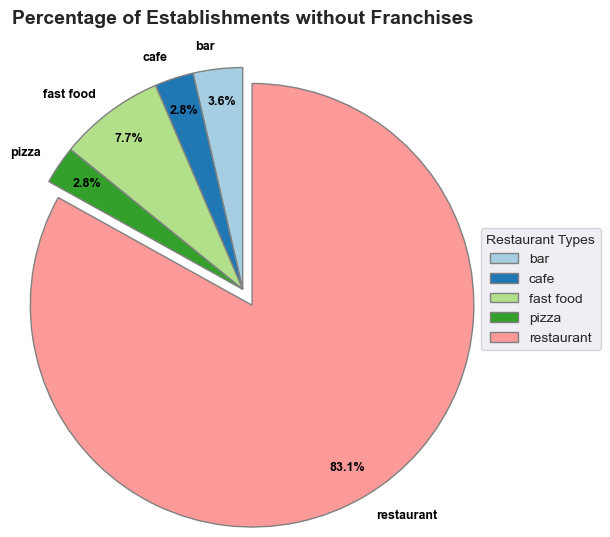

In [132]:
labels = chain_no['rest_type']
sizes = chain_no['count']

colors = plt.cm.Paired.colors  # color palette
explode = [0.1 if label == 'restaurant' else 0 for label in labels]  # Highlights "restaurant"

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Percentage format
    textprops={'size': 9, 'weight': 'bold', 'color': 'black'},  # Percentage style
    radius=1.2,  # size
    colors=colors,
    explode=explode,
    startangle=90,
    pctdistance=0.85,  # Distance of percentages to the edge
    wedgeprops={'edgecolor': 'gray'}  # Edges
)

# Title with adjusted spacing
ax.set_title('Percentage of Establishments without Franchises', fontsize=14, weight='bold', pad=25)

# legend
ax.legend(labels, title="Restaurant Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


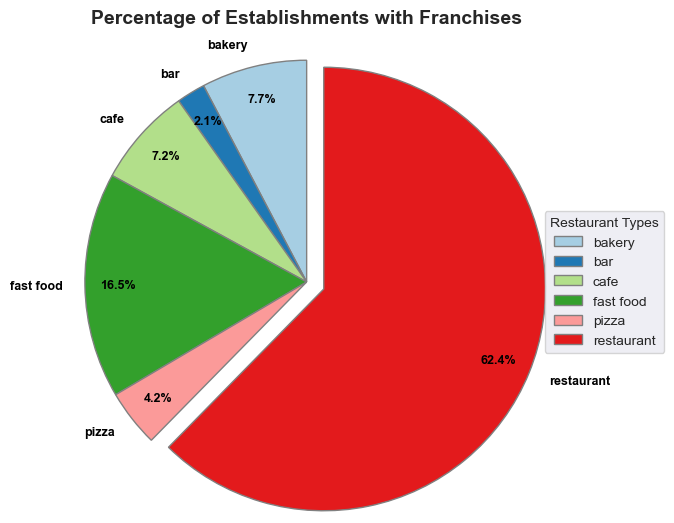

In [133]:
labels = chain_yes['rest_type']
sizes = chain_yes['count']
colors = plt.cm.Paired.colors  # color palette
explode = [0.1 if label == 'restaurant' else 0 for label in labels]  # Highlights "restaurant"

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Percentage format
    textprops={'size': 9, 'weight': 'bold', 'color': 'black'},  # Percentage style
    radius=1.2,  # size
    colors=colors,
    explode=explode,
    startangle=90,
    pctdistance=0.85,  # Distance of percentages to the edge
    wedgeprops={'edgecolor': 'gray'}  # Edges
)

# Title with adjusted spacing
ax.set_title('Percentage of Establishments with Franchises', fontsize=14, weight='bold', pad=20)

# Legend
ax.legend(labels, title="Restaurant Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


Note
- Most establishments that have chains are restaurants with the highest percentage. Bakeries are listed as chain only.

### What characterizes chains: many establishments with a small number of seats or few establishments with many seats?

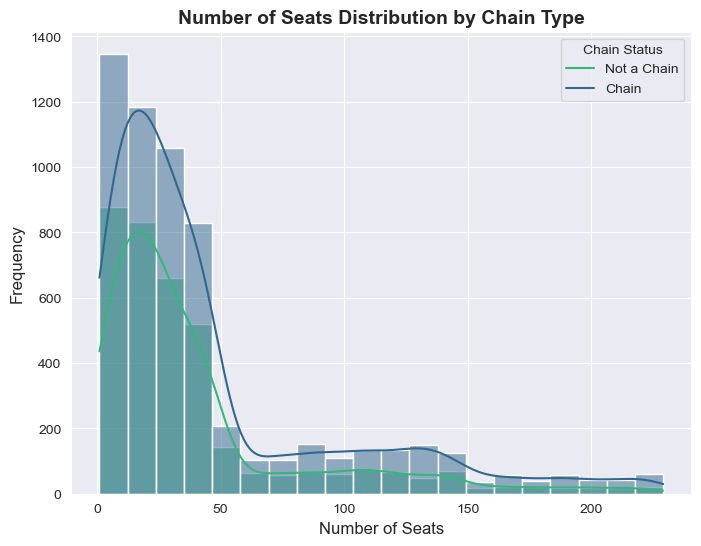

In [134]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='number_seats', hue='chain', kde=True, palette="viridis", bins=20)
plt.title('Number of Seats Distribution by Chain Type', fontsize=14, weight='bold')
plt.xlabel('Number of Seats', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['Not a Chain', 'Chain'], title='Chain Status', fontsize=10)
plt.show()




Note
- We can see that establishments that have the largest number of seats are not necessarily franchises. Most franchises have less than 50 seats.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the largest number of seats? Construct graphs.

In [135]:
seats = data.groupby(['rest_type', 'chain'])['number_seats'].mean().reset_index()
seats = seats.sort_values(by='number_seats', ascending=False) 
seats

,rest_type,chain,number_seats
9,restaurant,0,49.523886
1,bar,0,46.381395
10,restaurant,1,44.856021
2,bar,1,40.259740
6,fast food,1,38.089256
7,pizza,0,31.325301
4,cafe,1,25.917293
8,pizza,1,25.529412
5,fast food,0,23.633406
3,cafe,0,23.556213


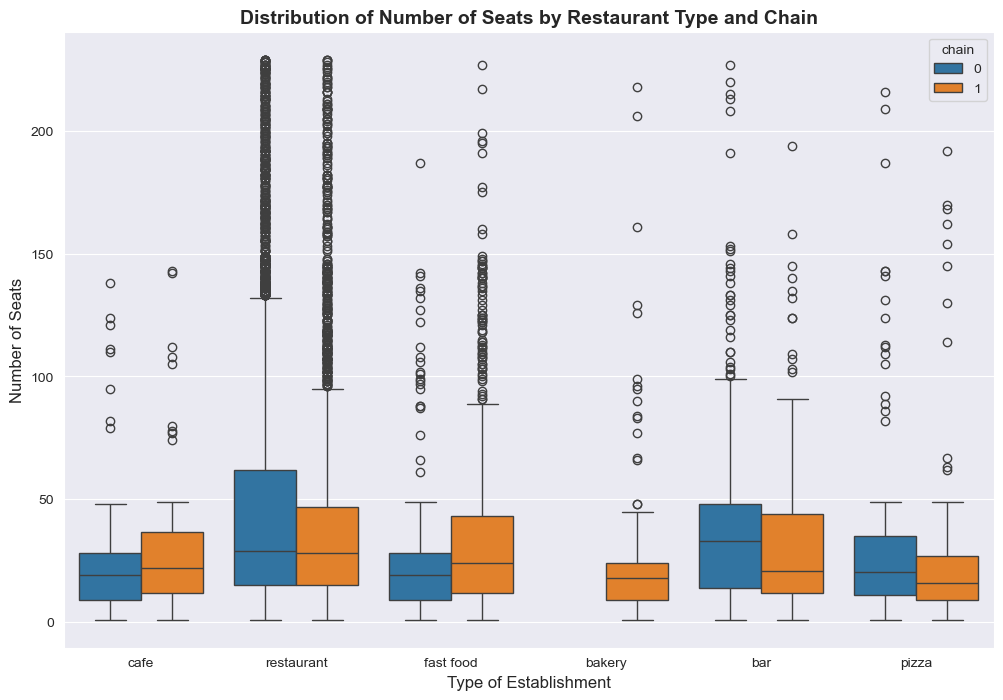

In [136]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='rest_type', y='number_seats', hue='chain', data=data)
plt.xlabel("Type of Establishment", fontsize=12)
plt.ylabel("Number of Seats", fontsize=12)
plt.title("Distribution of Number of Seats by Restaurant Type and Chain", fontsize=14, weight='bold')
plt.show()

Note
- The establishment with the highest average number of seats are non-franchise restaurants, followed by non-franchise bars. The establishment with the least number of seats are bakeries.

### Place the street name data from the address column in a separate column.

In [137]:
data['address_split'] = data['address'].str.split(',').str[0]
# data['address_split'] = data['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#data['address_split'] = data['address'].str.extract(r'^\d+\s([A-Za-z\s]+)') 
data.head()

,id,rest_name,address,chain,rest_type,number_seats,address_split
0,11786,habitat coffee shop,3708 n eagle rock blvd,0,cafe,26,3708 n eagle rock blvd
1,11787,reilly's,100 world way 120,0,restaurant,9,100 world way 120
2,11788,street churros,6801 hollywood blvd 253,0,fast food,20,6801 hollywood blvd 253
3,11789,triniti echo park,1814 w sunset blvd,0,restaurant,22,1814 w sunset blvd
4,11790,pollen,2100 echo park ave,0,restaurant,20,2100 echo park ave


### Build a graph of ten streets with the most restaurants.

C:\Users\ftmsl\AppData\Local\Temp\ipykernel_8896\1863677345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y ='street', data=best_street, palette='viridis', orient="y")


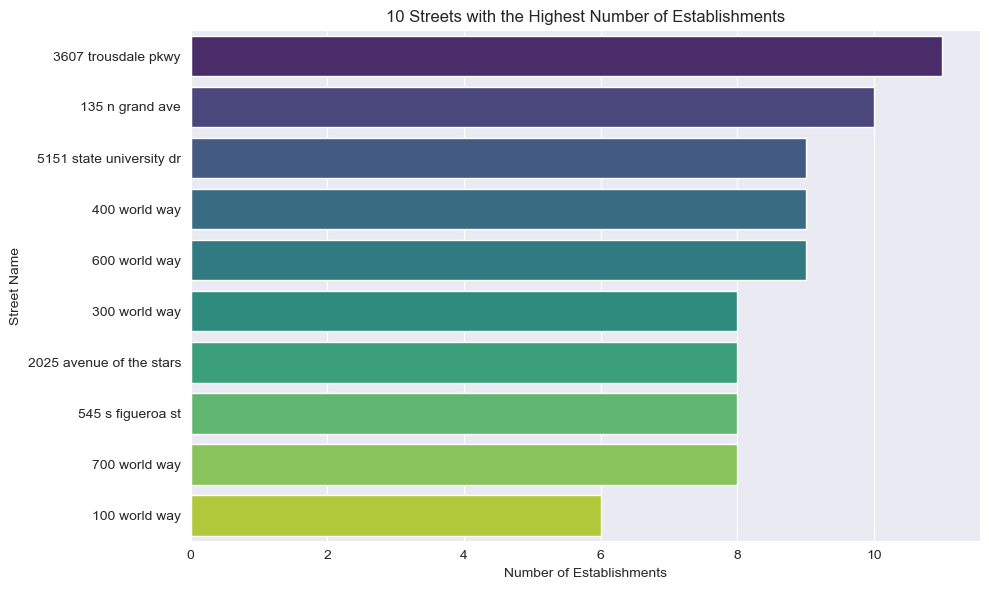

In [138]:
best_street = data['address_split'].value_counts().head(10).reset_index()
best_street.columns = ['street', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y ='street', data=best_street, palette='viridis', orient="y")
plt.title('10 Streets with the Highest Number of Establishments')
plt.xlabel('Number of Establishments')
plt.ylabel('Street Name')
plt.tight_layout()
plt.show()

### Find the number of streets that have only one restaurant.

In [139]:
not_pop = data['address_split'].value_counts()[data['address_split'].value_counts() == 1]
print(f'The number of streets with only 1 restaurant are', not_pop.count())

The number of streets with only 1 restaurant are 7587


### For streets with lots of restaurants, look at the distribution of seating. What trends do you notice?

In [140]:
# Filtering from the original DataFrame only the 10 most popular streets
trend = data[data['address'].isin(best_street['street'])]
trend

,id,rest_name,address,chain,rest_type,number_seats,address_split
19,11805,delta sky club t3,300 world way,0,restaurant,103,300 world way
46,11832,the counter space 7c,700 world way,1,restaurant,20,700 world way
56,11842,loteria grill space 7c,700 world way,0,restaurant,17,700 world way
62,11848,rolling stone space 7c,700 world way,0,restaurant,33,700 world way
107,11893,admirals club,400 world way,0,restaurant,118,400 world way
...,...,...,...,...,...,...,...
8207,19993,grilled cheese please,400 world way,0,restaurant,11,400 world way
8557,20343,la provence cafe,400 world way,0,restaurant,11,400 world way
8589,20375,food and bounty,400 world way,1,restaurant,21,400 world way
8944,20730,the coffee bean & tea leaf,700 world way,1,cafe,16,700 world way


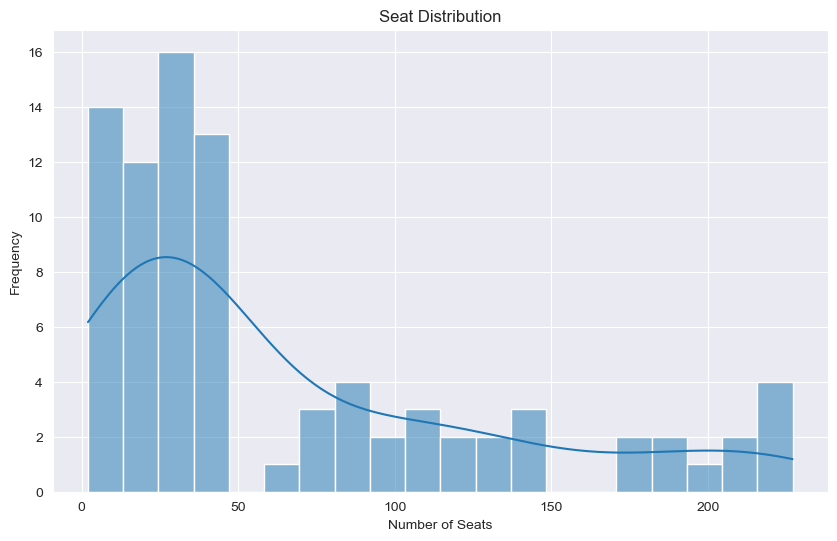

C:\Users\ftmsl\AppData\Local\Temp\ipykernel_8896\207783649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='address_split', y='number_seats', data=trend, palette='Set1')


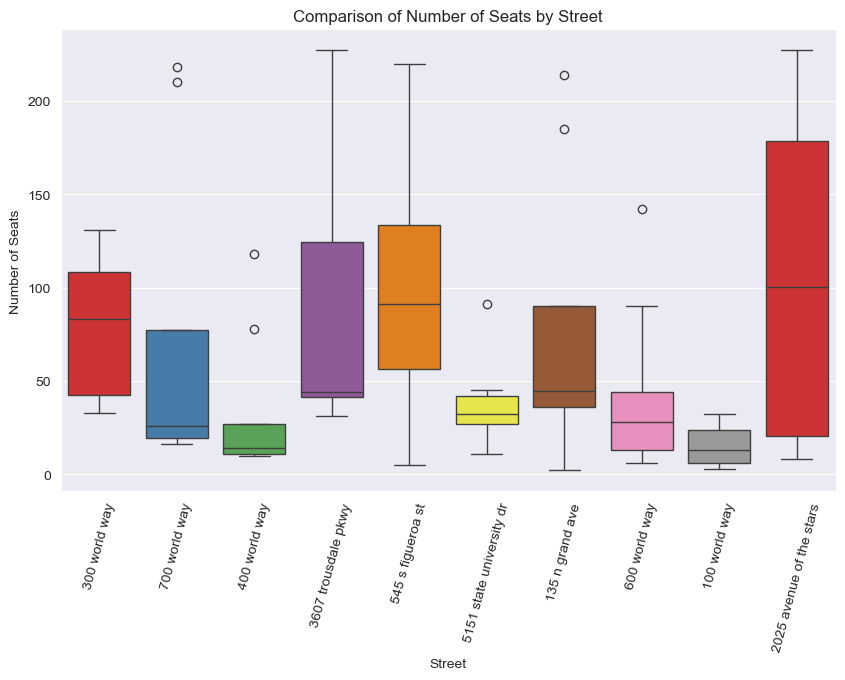

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(data=trend, x='number_seats', bins=20, kde=True)
plt.title('Seat Distribution')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

# Box plot by street
plt.figure(figsize=(10, 6))
sns.boxplot(x='address_split', y='number_seats', data=trend, palette='Set1')
plt.title('Comparison of Number of Seats by Street')
plt.xlabel('Street')
plt.ylabel('Number of Seats')
plt.xticks(rotation=75)
plt.show()

Note
- We noticed that some streets with the largest number of seats are not necessarily the streets with the most restaurants.

### Final Conclusion

In this analysis, we checked the most popular streets compared to the number of seats and whether there was any difference if the establishment was part of a franchise or not. For more robust decision-making, we could take into account the revenue of each establishment, but since this information is not provided, here are the recommendations we were able to make:
- If the street is popular, the value of the point will probably be higher. In the short term, a fast-food chain or a pizzeria with an average number of seats between 25 and 40 seems like a good option for a faster return on the amount invested.
- If the intention is to open a restaurant chain, a higher amount of capital and a larger location are required, since these are the establishments with the largest number of seats, and possibly the type of establishment that takes the longest to return the capital invested.
- We cannot fail to consider that the type of establishment such as restaurants is the largest in this region, so competition will be high and this may not be good. 
- If we want to invest in an establishment on less popular streets, we can invest in a type of bakery or bar where the size of the place may be smaller, people tend to stay for less time, and customer turnover may be high.